# VGG 16 Transfer Learning in Keras

### Dataset Link :- https://universe.roboflow.com/universidadde-de-trsosmontes-e-alto-douro/rotten-apples-detection

Dataset Name :- Good & Rotten Apples

### Let's Download the Dataset using Roboflow

In [5]:
#roboflow api key, from colab secrets
from google.colab import userdata
roboflow_api_key=userdata.get('roboflow_api_key')

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=roboflow_api_key)
project = rf.workspace("universidadde-de-trsosmontes-e-alto-douro").project("rotten-apples-detection")
version = project.version(5)
dataset = version.download("folder")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rotten-apples-detection-5 in folder:: 100%|██████████| 904/904 [00:00<00:00, 8316.46it/s]


### Importing Libraries

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

### Setup basic paths

In [8]:
base_dir = '/content/Rotten-apples-detection-5'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'valid')

### Load and preprocess data

In [9]:
img_size = 224
batch_size = 16

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
!cd Rotten-apples-detection-5

In [12]:
%cd /content/Rotten-apples-detection-5/train

/content/Rotten-apples-detection-5/train


In [13]:
!ls

'Good Apple'  'Good Apple Rotten Apple'  'Rotten Apple'


In [14]:
!rm -rf 'Good Apple Rotten Apple'

In [15]:
!ls

'Good Apple'  'Rotten Apple'


In [16]:
train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical')

val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical')

Found 777 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


### Load VGG16 base model

In [17]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False  # Freeze convolutional base

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Add custom classification head

In [18]:
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_gen.num_classes, activation='sigmoid')(x)

In [19]:
model = Model(inputs=base_model.input, outputs=predictions)

In [20]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,338 (68.38 MB)

 Trainable params: 3,211,650 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

### Compile model

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train model

In [22]:
history = model.fit(train_gen, epochs=5, validation_data=val_gen)

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 442ms/step - accuracy: 0.6174 - loss: 1.6594 - val_accuracy: 0.9800 - val_loss: 0.1596
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 265ms/step - accuracy: 0.8176 - loss: 0.4149 - val_accuracy: 0.9700 - val_loss: 0.1836
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 252ms/step - accuracy: 0.8442 - loss: 0.3474 - val_accuracy: 0.9700 - val_loss: 0.0906
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 244ms/step - accuracy: 0.8689 - loss: 0.3060 - val_accuracy: 0.9800 - val_loss: 0.1213
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 247ms/step - accuracy: 0.8786 - loss: 0.2754 - val_accuracy: 0.9700 - val_loss: 0.0723


### Evaluate model

In [23]:
loss, acc = model.evaluate(val_gen)
print(f"Test Accuracy: {acc:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.9764 - loss: 0.0694 
Test Accuracy: 0.97


### Inference: Predict and visualize some test images

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


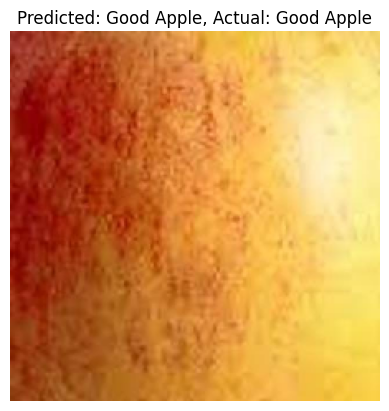

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


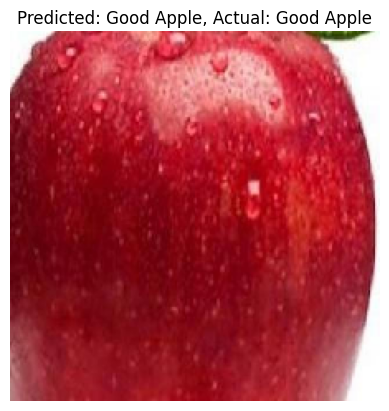

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


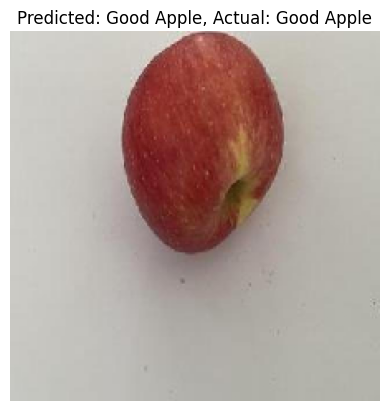

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


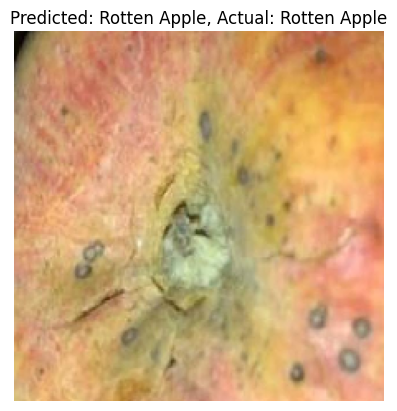

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


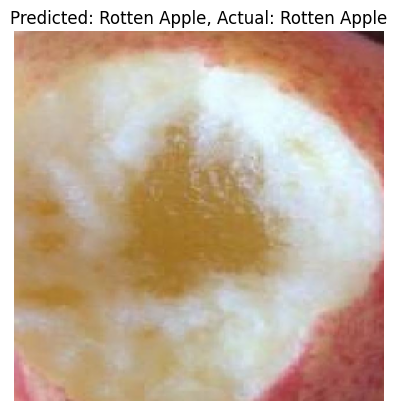

In [24]:
class_labels = list(val_gen.class_indices.keys())

def plot_predictions(generator, model, num=5):
    for i in range(num):
        # Use the built-in next() function to get the next batch from the generator
        img, label = next(generator)
        pred = model.predict(img)
        plt.imshow(img[0])
        # Apply np.argmax to the label of the first image in the batch (label[0])
        plt.title(f"Predicted: {class_labels[np.argmax(pred[0])]}, Actual: {class_labels[np.argmax(label[0])]}")
        plt.axis('off')
        plt.show()

plot_predictions(val_gen, model, )